<a href="https://colab.research.google.com/github/Romneasek/Employee_Attraction_Prediction/blob/main/Employee_Attraction_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [133]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [134]:
data = pd.read_csv("/content/train_data.csv")

In [135]:
data.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1


In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   MMM-YY                19104 non-null  object
 1   Emp_ID                19104 non-null  int64 
 2   Age                   19104 non-null  int64 
 3   Gender                19104 non-null  object
 4   City                  19104 non-null  object
 5   Education_Level       19104 non-null  object
 6   Salary                19104 non-null  int64 
 7   Dateofjoining         19104 non-null  object
 8   LastWorkingDate       1616 non-null   object
 9   Joining Designation   19104 non-null  int64 
 10  Designation           19104 non-null  int64 
 11  Total Business Value  19104 non-null  int64 
 12  Quarterly Rating      19104 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 1.9+ MB


In [137]:
miss_val = data.isna().sum()
miss_val

MMM-YY                      0
Emp_ID                      0
Age                         0
Gender                      0
City                        0
Education_Level             0
Salary                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Designation                 0
Total Business Value        0
Quarterly Rating            0
dtype: int64

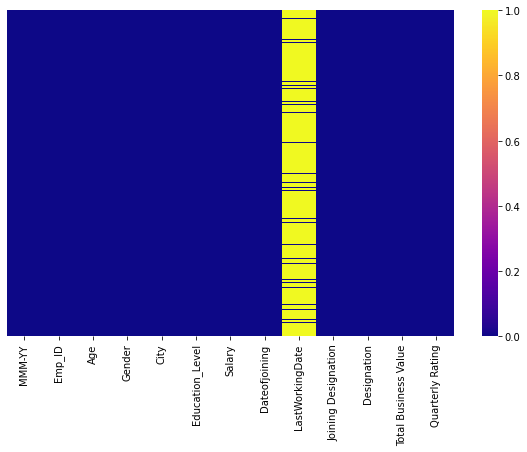

In [138]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(),yticklabels=False,cmap='plasma')

In [139]:
data.columns

Index(['MMM-YY', 'Emp_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Salary', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Designation', 'Total Business Value', 'Quarterly Rating'],
      dtype='object')

In [140]:
data['Dateofjoining'] = pd.to_datetime(data['Dateofjoining'])
data['LastWorkingDate'] = pd.to_datetime(data['LastWorkingDate'])

In [141]:
data['Year_of_join'] = data['Dateofjoining'].apply(lambda t:t.year)
data['Month_of_join'] = data['Dateofjoining'].apply(lambda t:t.month)
data['Day_of_join'] = data['Dateofjoining'].apply(lambda t:t.day)
data['Year_of_leave'] = data['LastWorkingDate'].apply(lambda t:t.year)
data['Month_of_leave'] = data['LastWorkingDate'].apply(lambda t:t.month)

In [142]:
data.drop(columns = 'Dateofjoining', inplace=True)

In [143]:
data = data.astype({'Year_of_join':int,'Month_of_join':int,'Day_of_join':int})

In [144]:
data['Target'] = np.nan

In [145]:
data['Target'] = np.where(data['LastWorkingDate'].isnull(),0,1)

In [146]:
data.drop(columns='LastWorkingDate', inplace=True)

In [147]:
data.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating,Year_of_join,Month_of_join,Day_of_join,Year_of_leave,Month_of_leave,Target
0,2016-01-01,1,28,Male,C23,Master,57387,1,1,2381060,2,2015,12,24,NaN,NaN,0
1,2016-02-01,1,28,Male,C23,Master,57387,1,1,-665480,2,2015,12,24,NaN,NaN,0
2,2016-03-01,1,28,Male,C23,Master,57387,1,1,0,2,2015,12,24,2016.0,3.0,1
3,2017-11-01,2,31,Male,C7,Master,67016,2,2,0,1,2017,11,6,NaN,NaN,0
4,2017-12-01,2,31,Male,C7,Master,67016,2,2,0,1,2017,11,6,NaN,NaN,0


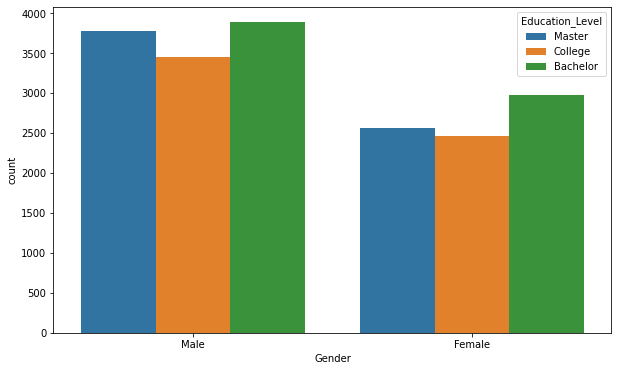

In [148]:
plt.figure(figsize=(10,6))
sns.countplot(data=data, x ="Gender", hue="Education_Level")

In [149]:
joiner = data.groupby(by=['Year_of_join', 'Month_of_join']).count()['Emp_ID'].unstack()

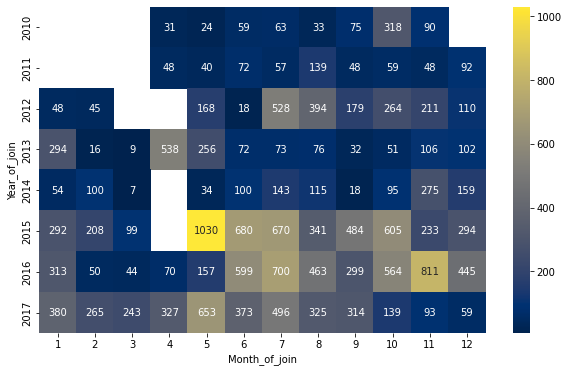

In [150]:
plt.figure(figsize=(10,6))
sns.heatmap(joiner,annot=True,fmt='.4g',cmap='cividis')

In [151]:
data["Target"].value_counts()

0    17488
1     1616
Name: Target, dtype: int64

In [152]:
leaver = data.groupby(by=['Year_of_leave', 'Month_of_leave']).count()['Emp_ID'].unstack()

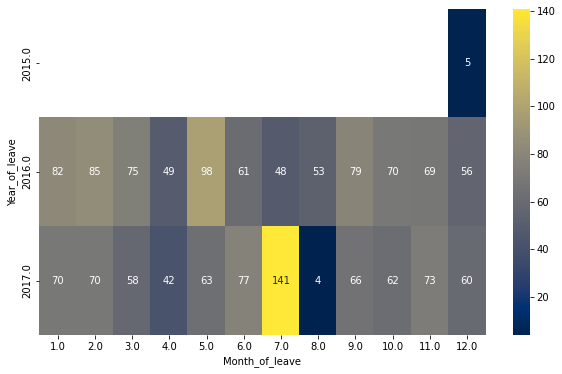

In [153]:
plt.figure(figsize=(10,6))
sns.heatmap(leaver,annot=True, fmt='.4g',cmap='cividis')

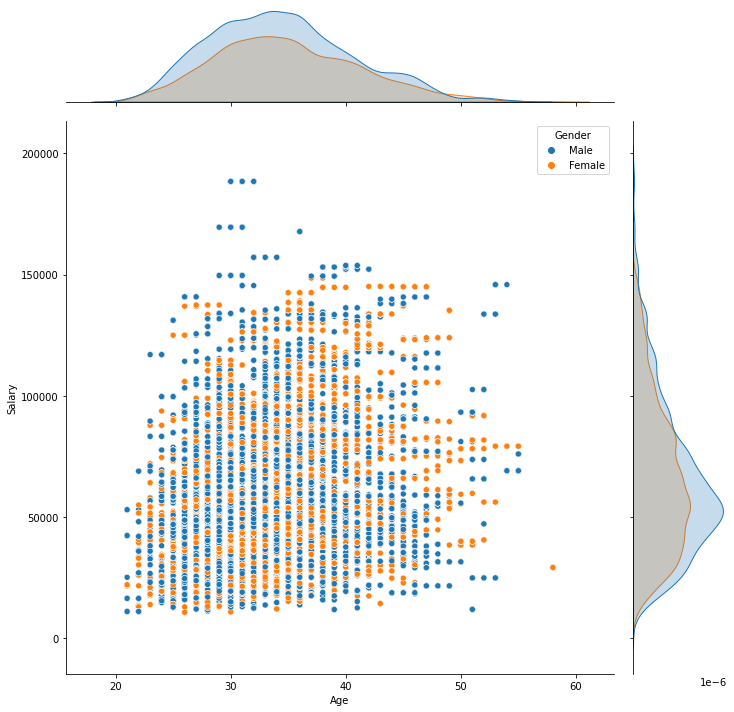

In [154]:
sns.jointplot(data=data, x='Age', y='Salary', hue='Gender', height=10)

<Figure size 720x432 with 0 Axes>

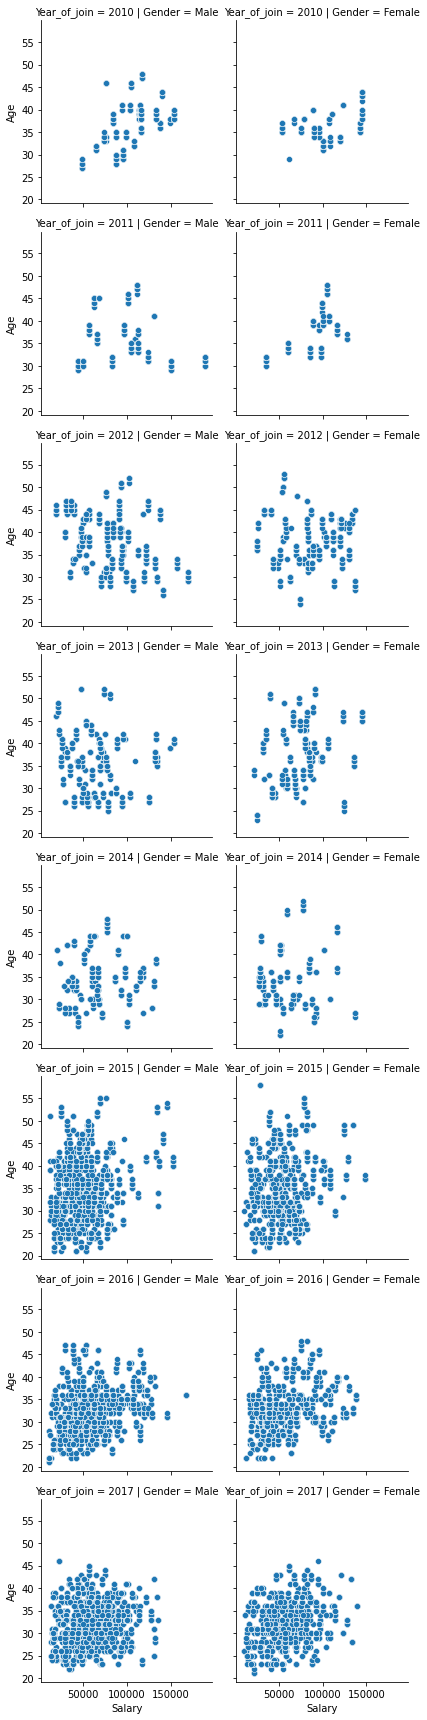

In [155]:
plt.figure(figsize=(10,6))
fg = sns.FacetGrid(data, col='Gender', row='Year_of_join')
fg.map(sns.scatterplot, 'Salary', 'Age')

In [156]:
data.groupby(by=['Education_Level', 'Gender', 'Target', 'City']).count()['Emp_ID'].unstack()

City                            C1  C10  C11  C12  C13  C14  C15  C16  C17  \
Education_Level Gender Target                                                
Bachelor        Female 0       131   58  170   74   84   48   90  118   73   
                       1         6    8    7    4    4    9    7    8    6   
                Male   0       186  127   66  186   91  108  244  148   87   
                       1         8   13    8   11   12   15   14    8    9   
College         Female 0        75   99   17   84   68   70   83   76   30   
                       1         9   12    3    7    7    5   12    7    6   
                Male   0        55  147   42  141  145  125   45  165   90   
                       1        10    8    6    9   11   11   14   14   12   
Master          Female 0        59   99   44   77   21   79   58   61   64   
                       1        14    6    7   10    8    7    7    5   11   
                Male   0       115  153   84  112  102  160  172   91   41   
                       1         9   14   14   12   16   11   15    8   11   

City                           C18  ...  C27  C28  C29   C3   C4   C5   C6  \
Education_Level Gender Target       ...                                      
Bachelor        Female 0       132  ...  119  109  190   52   69   45  106   
                       1        11  ...   16    7   10    9    6    3    8   
                Male   0        43  ...  110  140  132   92   93  156   78   
                       1         8  ...   11   14    9    7   13    8    8   
College         Female 0        52  ...  136   37   89  121   58   88   83   
                       1         5  ...    8    8    1   11    5    8   14   
                Male   0        86  ...  137  128  123   77   77   88  135   
                       1         8  ...   12   10   11    9   13    7    8   
Master          Female 0        74  ...  124   78   71  139  103   66  103   
                       1         4  ...    4    4    7    8    7   11    8   
                Male   0       113  ...  100  132  244  104  126  165  100   
                       1         8  ...    9   16   13    8    8   11    9   

City                            C7   C8   C9  
Education_Level Gender Target                 
Bachelor        Female 0        60  162  114  
                       1        10    6    7  
                Male   0       143   68  114  
                       1        13    8   13  
College         Female 0        93  103   34  
                       1         9   10   10  
                Male   0        68   76   36  
                       1         5   18   10  
Master          Female 0        61  166   63  
                       1         7    7    7  
                Male   0       132   84  106  
                       1         8    4    6  

[12 rows x 29 columns]

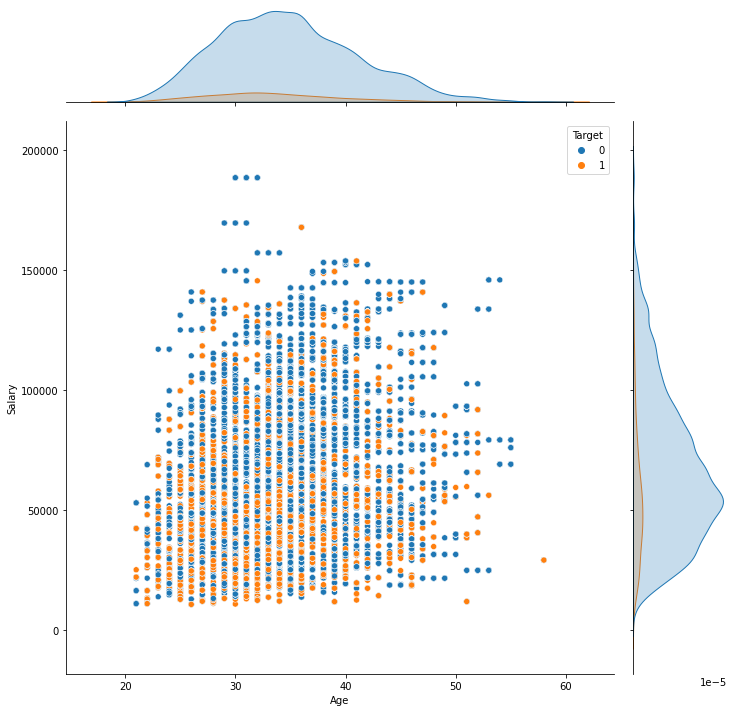

In [157]:
sns.jointplot(data=data,x='Age',y='Salary',hue='Target',height=10)

<Figure size 720x432 with 0 Axes>

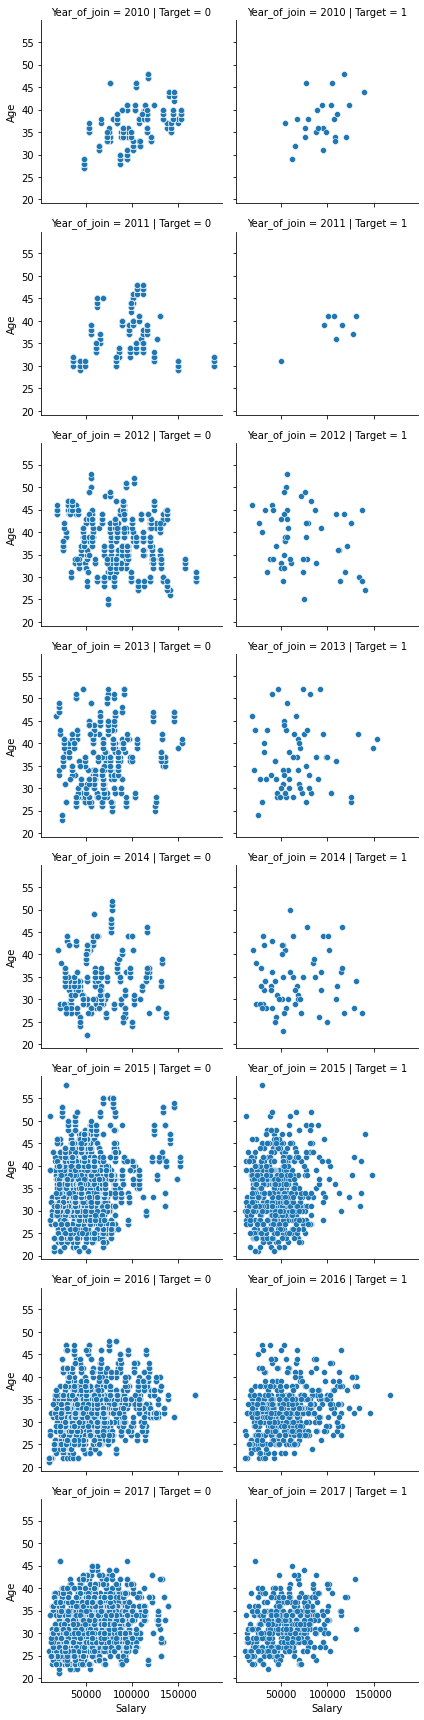

In [158]:
plt.figure(figsize=(10,6))
fg = sns.FacetGrid(data, col='Target', row='Year_of_join')
fg.map(sns.scatterplot, 'Salary', 'Age')

<Figure size 720x432 with 0 Axes>

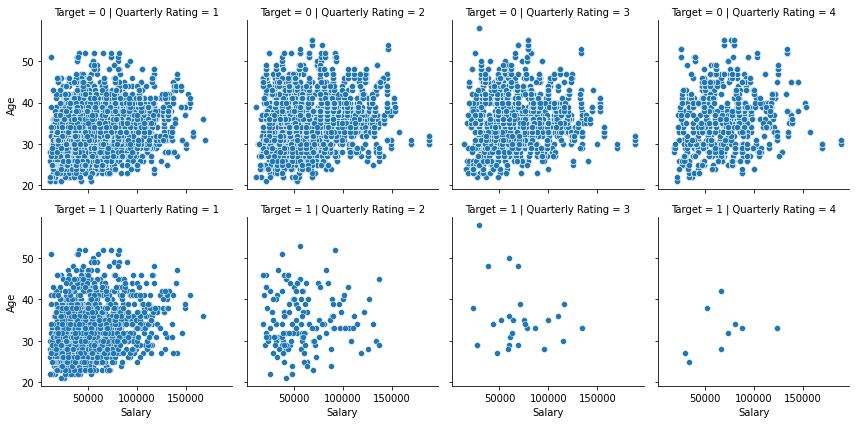

In [159]:
plt.figure(figsize=(10,6))
fg = sns.FacetGrid(data, col="Quarterly Rating",  row='Target')
fg.map(sns.scatterplot, "Salary", "Age")

In [160]:
data['Length_of_work'] = data['Year_of_leave'] - data['Year_of_join']

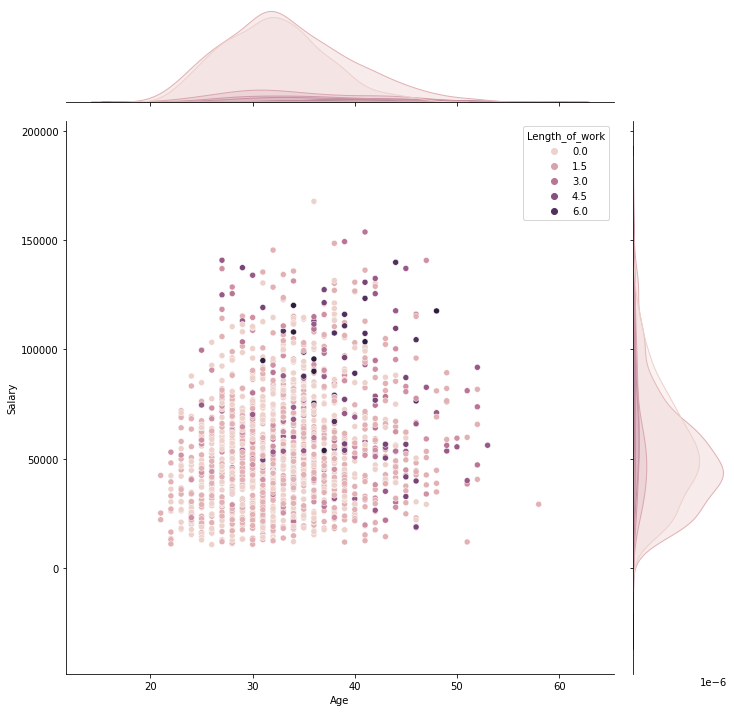

In [161]:
sns.jointplot(data=data,x='Age',y='Salary',hue='Length_of_work',height=10)

<Figure size 720x432 with 0 Axes>

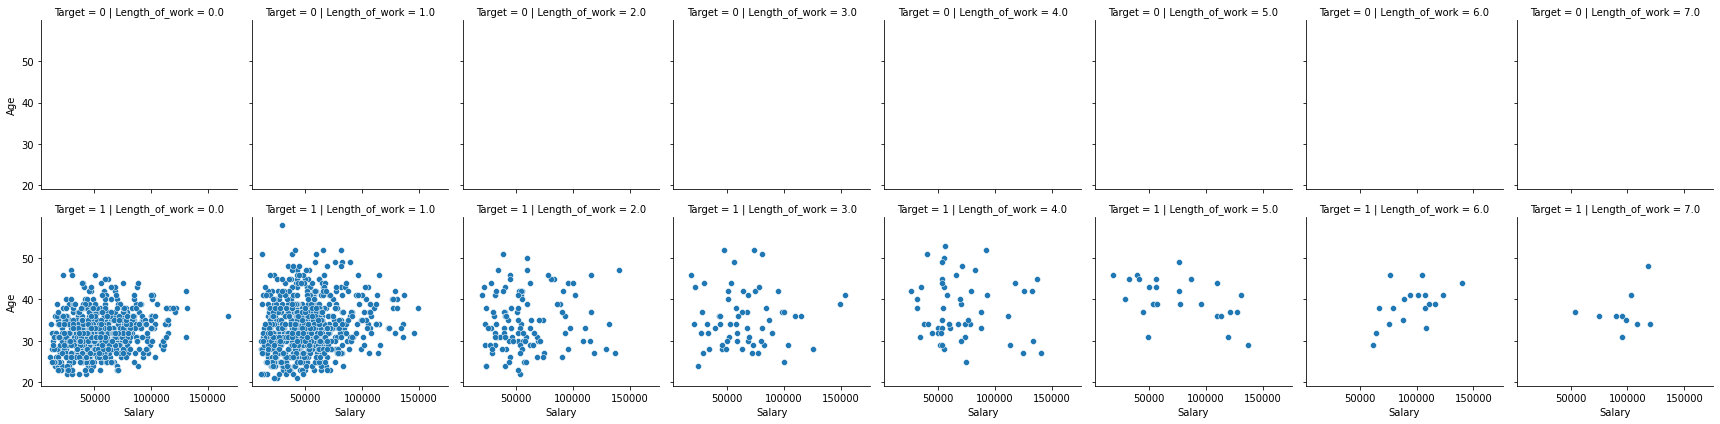

In [162]:
plt.figure(figsize=(10,6))
fg = sns.FacetGrid(data, col="Length_of_work",  row='Target')
fg.map(sns.scatterplot, "Salary", "Age")

<Figure size 720x432 with 0 Axes>

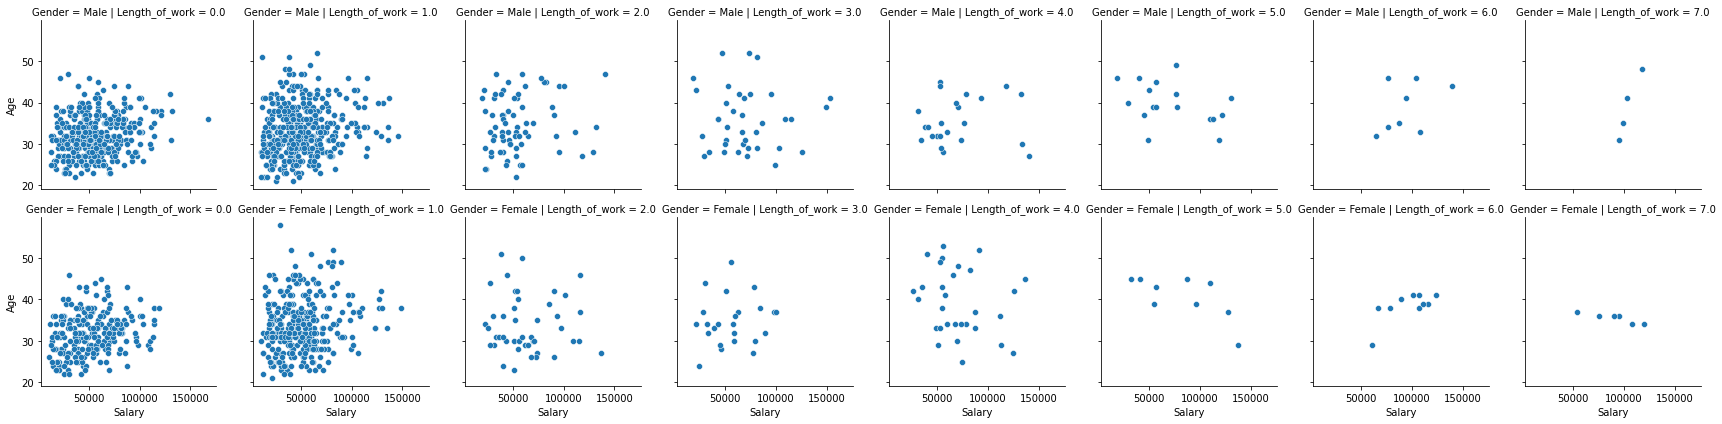

In [163]:
plt.figure(figsize=(10,6))
fg = sns.FacetGrid(data, col="Length_of_work",  row='Gender')
fg.map(sns.scatterplot, "Salary", "Age")

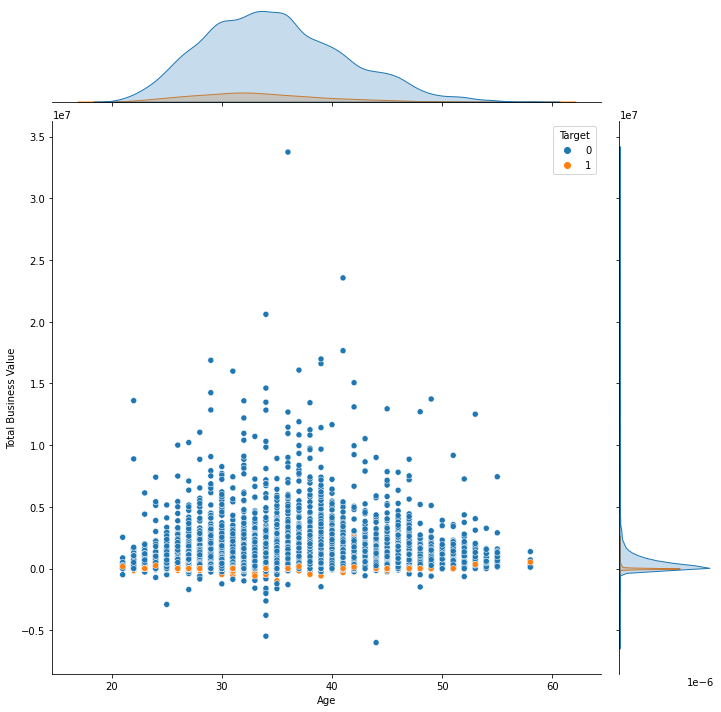

In [164]:
sns.jointplot(data=data,x='Age',y='Total Business Value',hue='Target',height=10)

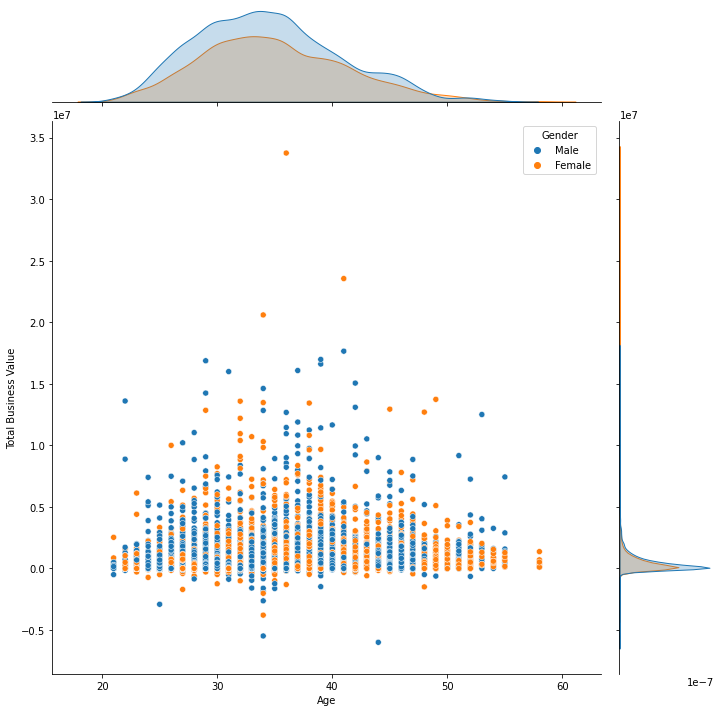

In [165]:
sns.jointplot(data=data,x='Age',y='Total Business Value',hue='Gender',height=10)

In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                19104 non-null  object 
 1   Emp_ID                19104 non-null  int64  
 2   Age                   19104 non-null  int64  
 3   Gender                19104 non-null  object 
 4   City                  19104 non-null  object 
 5   Education_Level       19104 non-null  object 
 6   Salary                19104 non-null  int64  
 7   Joining Designation   19104 non-null  int64  
 8   Designation           19104 non-null  int64  
 9   Total Business Value  19104 non-null  int64  
 10  Quarterly Rating      19104 non-null  int64  
 11  Year_of_join          19104 non-null  int64  
 12  Month_of_join         19104 non-null  int64  
 13  Day_of_join           19104 non-null  int64  
 14  Year_of_leave         1616 non-null   float64
 15  Month_of_leave     

In [167]:
data.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating,Year_of_join,Month_of_join,Day_of_join,Year_of_leave,Month_of_leave,Target,Length_of_work
0,2016-01-01,1,28,Male,C23,Master,57387,1,1,2381060,2,2015,12,24,NaN,NaN,0,NaN
1,2016-02-01,1,28,Male,C23,Master,57387,1,1,-665480,2,2015,12,24,NaN,NaN,0,NaN
2,2016-03-01,1,28,Male,C23,Master,57387,1,1,0,2,2015,12,24,2016.0,3.0,1,1.0
3,2017-11-01,2,31,Male,C7,Master,67016,2,2,0,1,2017,11,6,NaN,NaN,0,NaN
4,2017-12-01,2,31,Male,C7,Master,67016,2,2,0,1,2017,11,6,NaN,NaN,0,NaN


In [168]:
sex = pd.get_dummies(data['Gender'], drop_first=True)
city = pd.get_dummies(['City'])
edu = pd.get_dummies(['Education_level'])

In [169]:
train = data.copy()
train.head(2)

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating,Year_of_join,Month_of_join,Day_of_join,Year_of_leave,Month_of_leave,Target,Length_of_work
0,2016-01-01,1,28,Male,C23,Master,57387,1,1,2381060,2,2015,12,24,NaN,NaN,0,NaN
1,2016-02-01,1,28,Male,C23,Master,57387,1,1,-665480,2,2015,12,24,NaN,NaN,0,NaN


In [170]:
train.drop(columns = ['MMM-YY', 'Emp_ID', 'Gender','City','Education_Level','Joining Designation','Designation','Year_of_leave','Month_of_leave','Length_of_work'], inplace=True)

In [171]:
train.head(1)

,Age,Salary,Total Business Value,Quarterly Rating,Year_of_join,Month_of_join,Day_of_join,Target
0,28,57387,2381060,2,2015,12,24,0


In [172]:
train = pd.concat([train,sex], axis=1)

In [173]:
train.tail()

,Age,Salary,Total Business Value,Quarterly Rating,Year_of_join,Month_of_join,Day_of_join,Target,Male
19099,30,70254,740280,3,2017,6,8,0,1
19100,30,70254,448370,3,2017,6,8,0,1
19101,30,70254,0,2,2017,6,8,0,1
19102,30,70254,200420,2,2017,6,8,0,1
19103,30,70254,411480,2,2017,6,8,0,1


In [174]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Age                   19104 non-null  int64
 1   Salary                19104 non-null  int64
 2   Total Business Value  19104 non-null  int64
 3   Quarterly Rating      19104 non-null  int64
 4   Year_of_join          19104 non-null  int64
 5   Month_of_join         19104 non-null  int64
 6   Day_of_join           19104 non-null  int64
 7   Target                19104 non-null  int64
 8   Male                  19104 non-null  uint8
dtypes: int64(8), uint8(1)
memory usage: 1.2 MB


In [175]:
train.describe()

,Age,Salary,Total Business Value,Quarterly Rating,Year_of_join,Month_of_join,Day_of_join,Target,Male
count,19104.000000,19104.000000,1.910400e+04,19104.000000,19104.000000,19104.000000,19104.000000,19104.000000,19104.000000
mean,34.650283,65652.025126,5.716621e+05,2.008899,2014.776330,7.093645,16.059307,0.084590,0.581187
std,6.264471,30914.515344,1.128312e+06,1.009832,1.920872,3.082911,9.219251,0.278277,0.493378
min,21.000000,10747.000000,-6.000000e+06,1.000000,2010.000000,1.000000,1.000000,0.000000,0.000000
25%,30.000000,42383.000000,0.000000e+00,1.000000,2013.000000,5.000000,8.000000,0.000000,0.000000
50%,34.000000,60087.000000,2.500000e+05,2.000000,2015.000000,7.000000,16.000000,0.000000,1.000000
75%,39.000000,83969.000000,6.997000e+05,3.000000,2016.000000,10.000000,24.000000,0.000000,1.000000
max,58.000000,188418.000000,3.374772e+07,4.000000,2017.000000,12.000000,31.000000,1.000000,1.000000


In [176]:
train.isna().sum()

Age                     0
Salary                  0
Total Business Value    0
Quarterly Rating        0
Year_of_join            0
Month_of_join           0
Day_of_join             0
Target                  0
Male                    0
dtype: int64

In [177]:
train_corr = train.corr()
train_corr

,Age,Salary,Total Business Value,Quarterly Rating,Year_of_join,Month_of_join,Day_of_join,Target,Male
Age,1.000000,0.192225,0.109426,0.172660,-0.284069,-0.008268,0.020615,-0.063656,-0.040142
Salary,0.192225,1.000000,0.234044,0.116897,-0.349634,-0.007978,0.013132,-0.100896,-0.013230
Total Business Value,0.109426,0.234044,1.000000,0.471224,-0.227337,-0.004711,0.024794,-0.142921,-0.008938
Quarterly Rating,0.172660,0.116897,0.471224,1.000000,-0.277963,-0.027726,0.068097,-0.260493,-0.008069
Year_of_join,-0.284069,-0.349634,-0.227337,-0.277963,1.000000,-0.146597,-0.089690,0.106496,0.011291
Month_of_join,-0.008268,-0.007978,-0.004711,-0.027726,-0.146597,1.000000,-0.013937,-0.002705,0.011882
Day_of_join,0.020615,0.013132,0.024794,0.068097,-0.089690,-0.013937,1.000000,-0.017402,0.007993
Target,-0.063656,-0.100896,-0.142921,-0.260493,0.106496,-0.002705,-0.017402,1.000000,0.003356
Male,-0.040142,-0.013230,-0.008938,-0.008069,0.011291,0.011882,0.007993,0.003356,1.000000


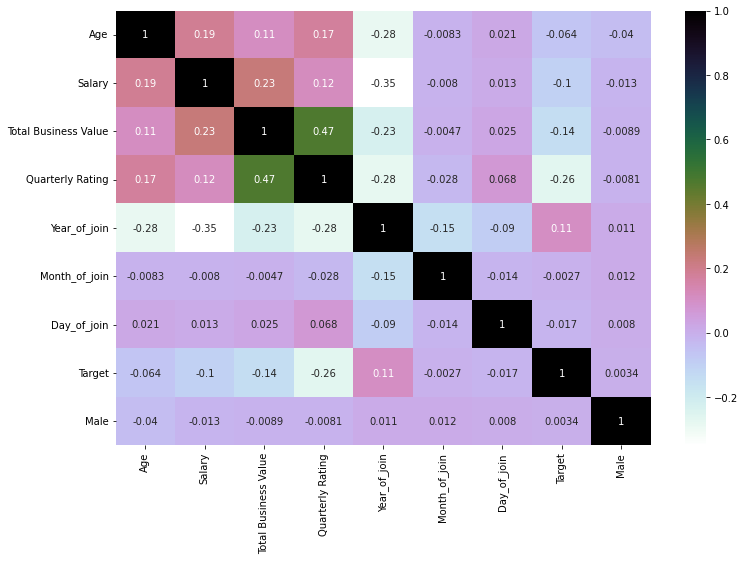

In [223]:
plt.figure(figsize=(12,8))
sns.heatmap(train_corr, cmap='cubehelix_r', annot=True)
plt.show()

In [179]:
x = train.drop('Target', axis=1)
y = train['Target']

In [180]:
from sklearn.model_selection import train_test_split

In [181]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.5)

In [182]:
print('Dimension of x_train dataframe:', x_train.shape)
print('Dimension of y_train dataframe:', y_train.shape)
print('Dimension of x_test dataframe:', x_test.shape)
print('Dimension of y_test dataframe:', y_test.shape)

Dimension of x_train dataframe: (9552, 8)
Dimension of y_train dataframe: (9552,)
Dimension of x_test dataframe: (9552, 8)
Dimension of y_test dataframe: (9552,)


In [183]:
from sklearn.linear_model import LogisticRegression

In [184]:
logreg = LogisticRegression()

In [185]:
logreg.fit(x_train,y_train)

LogisticRegression()

In [186]:
logreg_pred = logreg.predict(x_test)

In [187]:
print("Predicted value: ", logreg_pred[:10])
print("Actual value: ", y_test[:10])

Predicted value:  [0 0 0 0 0 0 0 0 0 0]
Actual value:  15939    0
16742    0
9552     0
2494     0
13952    0
3330     0
13907    0
16100    0
9309     0
4707     0
Name: Target, dtype: int64


In [205]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true = y_test, y_pred = logreg_pred)
print(accuracy)
print(f'Accuracy of the model Logistic Regression is {accuracy*100:.2f}%')

0.916247906197655
Accuracy of the model Logistic Regression is 91.62%


-------------------- LOGISTIC REGRESSION --------------------
Classification report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      8770
           1       0.20      0.01      0.01       782

    accuracy                           0.92      9552
   macro avg       0.56      0.50      0.49      9552
weighted avg       0.86      0.92      0.88      9552

------------------------------------------------------------


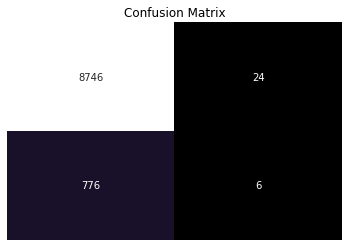

In [211]:
from sklearn.metrics import classification_report, confusion_matrix
viz_str = '-'*20
print(viz_str,'LOGISTIC REGRESSION', viz_str)
print('Classification report:')
print(classification_report(y_test, logreg_pred))
print('-'*60)
plt.title('Confusion Matrix')
sns.heatmap(confusion_matrix(y_test,logreg_pred),annot=True,fmt='g',cmap='cubehelix',cbar=False, yticklabels=False, xticklabels=False)


In [210]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfcpredictions = rfc.predict(x_test)
print("Predicted value: ", rfcpredictions[:10])
print("Actual value: ", y_test[:10])

Predicted value:  [1 0 0 0 0 0 0 0 0 1]
Actual value:  15939    0
16742    0
9552     0
2494     0
13952    0
3330     0
13907    0
16100    0
9309     0
4707     0
Name: Target, dtype: int64


In [213]:
accuracy = accuracy_score(y_true = y_test, y_pred = rfcpredictions)
print(f'Accuracy of the Random Forest Classifier model is {accuracy*100:.2f}%')

Accuracy of the Random Forest Classifier model is 89.01%


-------------------- RANDOM FOREST CLASSIFIER --------------------
Classification report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      8770
           1       0.18      0.10      0.12       782

    accuracy                           0.89      9552
   macro avg       0.55      0.53      0.53      9552
weighted avg       0.86      0.89      0.87      9552

------------------------------------------------------------


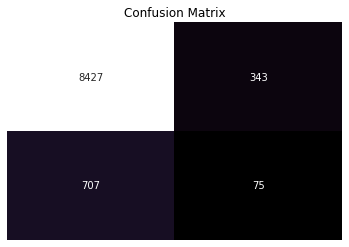

In [214]:
viz_str = '-'*20
print(viz_str,'RANDOM FOREST CLASSIFIER', viz_str)
print('Classification report:')
print(classification_report(y_test, rfcpredictions))
print('-'*60)
plt.title('Confusion Matrix')
sns.heatmap(confusion_matrix(y_test,rfcpredictions),annot=True,fmt='g',cmap='cubehelix',cbar=False, yticklabels=False, xticklabels=False)


In [215]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
svcpredictions = svc.predict(x_test)
print("Predicted value: ", svcpredictions[:10])
print("Actual value: ", y_test[:10])

Predicted value:  [0 0 0 0 0 0 0 0 0 0]
Actual value:  15939    0
16742    0
9552     0
2494     0
13952    0
3330     0
13907    0
16100    0
9309     0
4707     0
Name: Target, dtype: int64


In [216]:
accuracy = accuracy_score(y_true = y_test, y_pred = svcpredictions)
print(f'Accuracy of the SVC model is {accuracy*100:.2f}%')

Accuracy of the SVC model is 91.81%


-------------------- SUPPORT VECTOR CLASSIFIER --------------------
Classification report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      8770
           1       0.00      0.00      0.00       782

    accuracy                           0.92      9552
   macro avg       0.46      0.50      0.48      9552
weighted avg       0.84      0.92      0.88      9552

------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


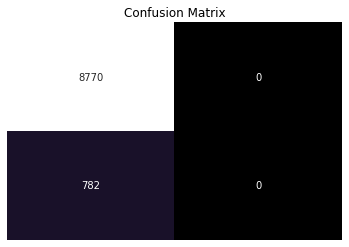

In [219]:
viz_str = '-'*20
print(viz_str,'SUPPORT VECTOR CLASSIFIER', viz_str)
print('Classification report:')
print(classification_report(y_test, svcpredictions))
print('-'*60)
plt.title('Confusion Matrix')
sns.heatmap(confusion_matrix(y_test,svcpredictions),annot=True,fmt='g',cmap='cubehelix',cbar=False, yticklabels=False, xticklabels=False)


In [220]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(x_train, y_train)
dtcprediction = dtc.predict(x_test)
print("Predicted value: ", dtcprediction[:10])
print("Actual value: ", y_test[:10])

Predicted value:  [1 0 0 0 0 0 0 0 0 1]
Actual value:  15939    0
16742    0
9552     0
2494     0
13952    0
3330     0
13907    0
16100    0
9309     0
4707     0
Name: Target, dtype: int64


In [221]:
accuracy = accuracy_score(y_true = y_test, y_pred = dtcprediction)
print(f'Accuracy of the Decision Tree Classifier model is {accuracy*100:.2f}%')

Accuracy of the Decision Tree Classifier model is 87.88%


-------------------- DECISION TREE CLASSIFIER --------------------
Classification report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      8770
           1       0.19      0.15      0.17       782

    accuracy                           0.88      9552
   macro avg       0.56      0.55      0.55      9552
weighted avg       0.87      0.88      0.87      9552

------------------------------------------------------------


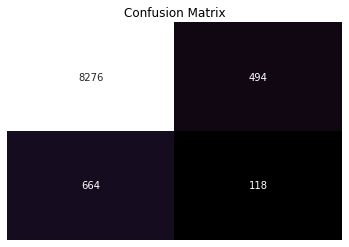

In [222]:
viz_str = '-'*20
print(viz_str,'DECISION TREE CLASSIFIER', viz_str)
print('Classification report:')
print(classification_report(y_test, dtcprediction))
print('-'*60)
plt.title('Confusion Matrix')
sns.heatmap(confusion_matrix(y_test,dtcprediction),annot=True,fmt='g',cmap='cubehelix',cbar=False, yticklabels=False, xticklabels=False)


In [225]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(x_train, y_train)
knnprediction = KNN.predict(x_test)
print("Predicted value: ", knnprediction[:10])
print("Actual value: ", y_test[:10])

Predicted value:  [0 0 0 0 0 0 0 0 0 0]
Actual value:  15939    0
16742    0
9552     0
2494     0
13952    0
3330     0
13907    0
16100    0
9309     0
4707     0
Name: Target, dtype: int64


In [231]:
print('The accuracy of the KNN with K=3 is {}%'.format(round(accuracy_score(y_test, knnprediction)*100,2)))

The accuracy of the KNN with K=3 is 89.9%


-------------------- KNN CLASSIFIER --------------------
Classification report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      8770
           1       0.15      0.05      0.08       782

    accuracy                           0.90      9552
   macro avg       0.54      0.51      0.51      9552
weighted avg       0.86      0.90      0.88      9552

------------------------------------------------------------


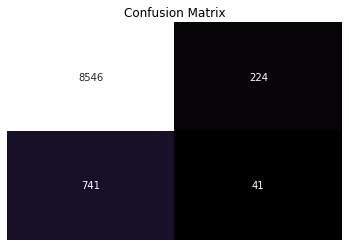

In [233]:
viz_str = '-'*20
print(viz_str,'KNN CLASSIFIER', viz_str)
print('Classification report:')
print(classification_report(y_test, knnprediction))
print('-'*60)
plt.title('Confusion Matrix')
sns.heatmap(confusion_matrix(y_test,knnprediction),annot=True,fmt='g',cmap='cubehelix',cbar=False, yticklabels=False, xticklabels=False)


We can see Support Vector Classifier (SVC) model gives us highest accuracy 91.81%.